In [2]:
#Importing libararies
%matplotlib inline
import os
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 8)
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report, roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier 
import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Change the directory name
os.chdir('C:/Users/ssahi/Documents/ML_Course/Assignment_1')

In [4]:
#Reading the data
df = pd.read_csv("sgemm_product.csv")

#Taking the average of runs for target variable
df["avg_run"] = df.iloc[:,14:].mean(axis = 1)

#Taking log of the Average run times
df["log_avg_run"] = np.log(df.avg_run) 

#Dropping the four Run columns
df.drop(['Run1 (ms)', 'Run2 (ms)','Run3 (ms)', 'Run4 (ms)'], axis = 1, inplace = True)

#Dropping the Average run column
df.drop(['avg_run'], axis = 1, inplace = True)

#Creating target classes
#threshold = median = 4.245490733029061

thresh = df.log_avg_run.median()
df["Tgt_Class"] = df.log_avg_run.apply(lambda x : 0 if x <= thresh else 1)
df.drop(['log_avg_run'], axis = 1, inplace = True)

In [5]:
#Divide the data into independent features X and Clasification lables Y
X = df.drop('Tgt_Class', axis=1)
y = df['Tgt_Class']

scaler = StandardScaler().fit(X)
X_sc = scaler.transform(X)
X_sc = pd.DataFrame(X_sc)

In [6]:
#Splitting into train-test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

#Scaling the independent features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## ANN

### Experimenting with hidden layers and activation function

In [6]:
# 1 hidden layer
acc_ANN = []
layer_size = np.arange(1,50,10)
act_func = ['identity', 'logistic', 'tanh', 'relu']

for j in act_func:
    acc_act_func = []
    for i in layer_size:
        ANN_model = MLPClassifier(hidden_layer_sizes=(i), activation=j, max_iter = 200, random_state=0)
        ANN_model.fit(X_train, y_train)
        
        y_pred_ANN = ANN_model.predict(X_test)
        
        accuracy = accuracy_score(y_test,y_pred_ANN)
        acc_act_func.append(accuracy)
    acc_ANN.append(acc_act_func)

In [13]:
acc_ANN

[[0.8065259381898455,
  0.8077952538631347,
  0.804635761589404,
  0.8124724061810155,
  0.8069122516556292],
 [0.8602235099337748,
  0.9548427152317881,
  0.9683222958057395,
  0.974241169977925,
  0.978780353200883],
 [0.8599061810154526,
  0.9524834437086093,
  0.9680187637969095,
  0.9756346578366446,
  0.978835540838852],
 [0.7320226269315673,
  0.9470612582781457,
  0.9666666666666667,
  0.9714955849889625,
  0.9782008830022075]]

Max Accuracy for Activation function identity : 0.81247 at Layer size: 31
Max Accuracy for Activation function logistic : 0.97878 at Layer size: 41
Max Accuracy for Activation function tanh : 0.97884 at Layer size: 41
Max Accuracy for Activation function relu : 0.97820 at Layer size: 41




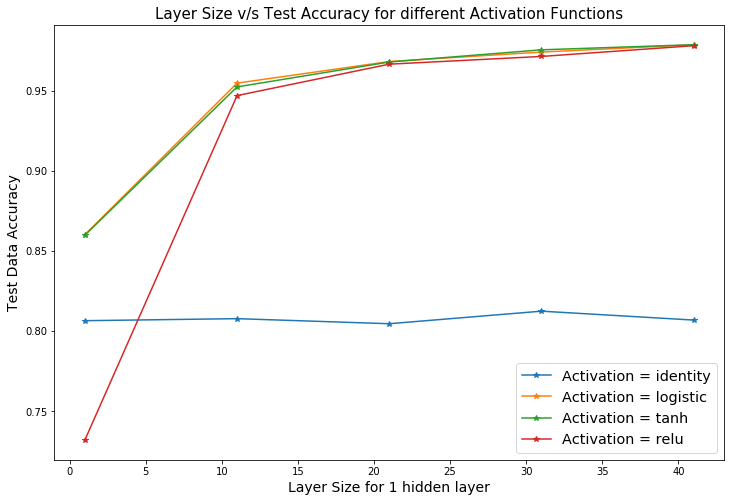

In [86]:
plt.rcParams['figure.figsize'] = (12, 8)
for i in range(0,len(act_func)):
    print("Max Accuracy for Activation function", act_func[i] ,":", "{:.5f}".format(max(acc_ANN[i]))
          , "at Layer size:", layer_size[acc_ANN[i].index(max(acc_ANN[i]))])
print("\n")

for i in range(0,len(act_func)):
    plt.plot(layer_size, acc_ANN[i], marker='*', label="Activation = {}".format(act_func[i]))
    plt.legend(loc='lower right', fontsize='x-large')
    plt.xlabel('Layer Size for 1 hidden layer', fontsize=14)
    plt.ylabel('Test Data Accuracy', fontsize=14)
    plt.title('Layer Size v/s Test Accuracy for different Activation Functions', fontsize=15)

In [15]:
# 2 hidden layer
acc_ANN_test = []
acc_ANN_train = []
layer_size = np.arange(1,50,10)
act_func = ['identity', 'logistic', 'tanh', 'relu']

for j in act_func:
    acc_act_func_test = []
    acc_act_func_train = []
    for i in layer_size:
        ANN_model = MLPClassifier(hidden_layer_sizes=(i,i), activation=j, max_iter = 300, random_state=0)
        ANN_model.fit(X_train, y_train)
        
        y_pred_ANN_test = ANN_model.predict(X_test)
        y_pred_ANN_train = ANN_model.predict(X_train)
        
        accuracy_test = accuracy_score(y_test,y_pred_ANN_test)
        accuracy_train = accuracy_score(y_train,y_pred_ANN_train)
        
        acc_act_func_test.append(accuracy_test)
        acc_act_func_train.append(accuracy_train)
        
    acc_ANN_test.append(acc_act_func_test)
    acc_ANN_train.append(acc_act_func_train)

Max Accuracy for Activation function identity : 0.81362 at Layer size: 31
Max Accuracy for Activation function logistic : 0.98586 at Layer size: 41
Max Accuracy for Activation function tanh : 0.98557 at Layer size: 31
Max Accuracy for Activation function relu : 0.98390 at Layer size: 41




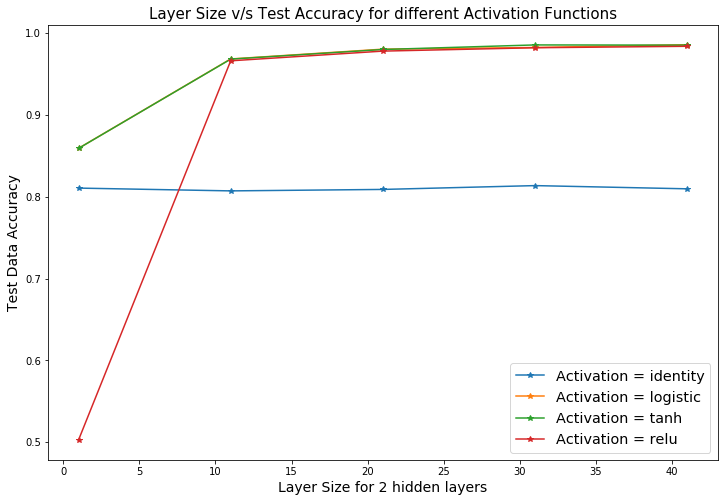

In [17]:
plt.rcParams['figure.figsize'] = (12, 8)
for i in range(0,len(act_func)):
    print("Max Accuracy for Activation function", act_func[i] ,":", "{:.5f}".format(max(acc_ANN_test[i]))
          , "at Layer size:", layer_size[acc_ANN_test[i].index(max(acc_ANN_test[i]))])
print("\n")

for i in range(0,len(act_func)):
    plt.plot(layer_size, acc_ANN_test[i], marker='*', label="Activation = {}".format(act_func[i]))
    plt.legend(loc='lower right', fontsize='x-large')
    plt.xlabel('Layer Size for 2 hidden layers', fontsize=14)
    plt.ylabel('Test Data Accuracy', fontsize=14)
    plt.title('Layer Size v/s Test Accuracy for different Activation Functions', fontsize=15)

Max Accuracy for Activation function identity : 0.81468 at Layer size: 31
Max Accuracy for Activation function logistic : 0.98853 at Layer size: 41
Max Accuracy for Activation function tanh : 0.99030 at Layer size: 41
Max Accuracy for Activation function relu : 0.98730 at Layer size: 41




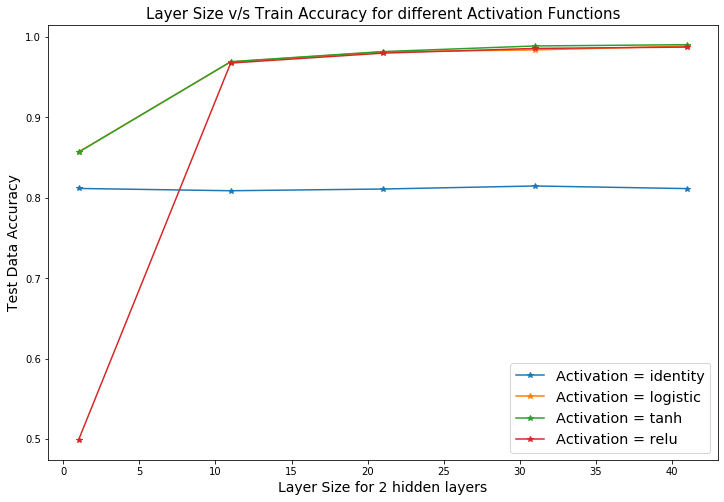

In [18]:
plt.rcParams['figure.figsize'] = (12, 8)
for i in range(0,len(act_func)):
    print("Max Accuracy for Activation function", act_func[i] ,":", "{:.5f}".format(max(acc_ANN_train[i]))
          , "at Layer size:", layer_size[acc_ANN_train[i].index(max(acc_ANN_train[i]))])
print("\n")

for i in range(0,len(act_func)):
    plt.plot(layer_size, acc_ANN_train[i], marker='*', label="Activation = {}".format(act_func[i]))
    plt.legend(loc='lower right', fontsize='x-large')
    plt.xlabel('Layer Size for 2 hidden layers', fontsize=14)
    plt.ylabel('Train Data Accuracy', fontsize=14)
    plt.title('Layer Size v/s Train Accuracy for different Activation Functions', fontsize=15)

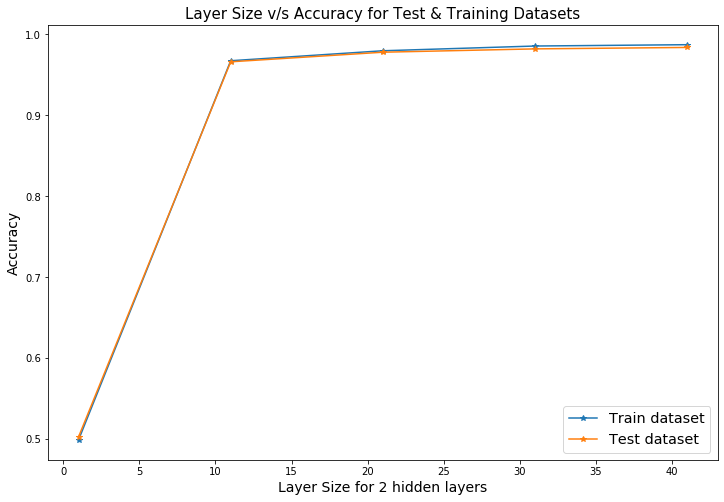

In [19]:
train_acc_relu = acc_ANN_train[3]
test_acc_relu = acc_ANN_test[3]

plt.plot(layer_size, train_acc_relu, marker='*', label="Train dataset")
plt.plot(layer_size, test_acc_relu, marker='*', label="Test dataset")
plt.legend(loc='lower right', fontsize='x-large')
plt.xlabel('Layer Size for 2 hidden layers', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Layer Size v/s Accuracy for Test & Training Datasets', fontsize=15)
plt.show()

In [20]:
# 3 hidden layer
acc_ANN_test = []
acc_ANN_train = []
layer_size = np.arange(1,50,10)
act_func = ['identity', 'logistic', 'tanh', 'relu']

for j in act_func:
    acc_act_func_test = []
    acc_act_func_train = []
    for i in layer_size:
        ANN_model = MLPClassifier(hidden_layer_sizes=(i,i,i), activation=j, max_iter = 300, random_state=0)
        ANN_model.fit(X_train, y_train)
        
        y_pred_ANN_test = ANN_model.predict(X_test)
        y_pred_ANN_train = ANN_model.predict(X_train)
        
        accuracy_test = accuracy_score(y_test,y_pred_ANN_test)
        accuracy_train = accuracy_score(y_train,y_pred_ANN_train)
        
        acc_act_func_test.append(accuracy_test)
        acc_act_func_train.append(accuracy_train)
        
    acc_ANN_test.append(acc_act_func_test)
    acc_ANN_train.append(acc_act_func_train)

Max Accuracy for Activation function identity : 0.80949 at Layer size: 1
Max Accuracy for Activation function logistic : 0.98571 at Layer size: 41
Max Accuracy for Activation function tanh : 0.98740 at Layer size: 41
Max Accuracy for Activation function relu : 0.98725 at Layer size: 41




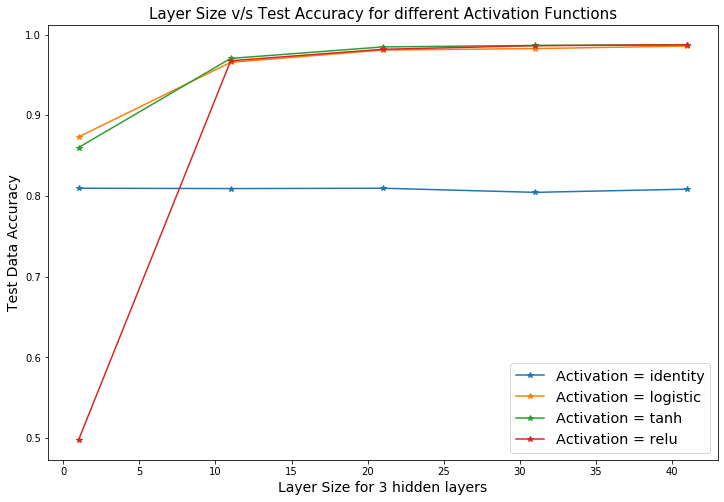

In [21]:
plt.rcParams['figure.figsize'] = (12, 8)
for i in range(0,len(act_func)):
    print("Max Accuracy for Activation function", act_func[i] ,":", "{:.5f}".format(max(acc_ANN_test[i]))
          , "at Layer size:", layer_size[acc_ANN_test[i].index(max(acc_ANN_test[i]))])
print("\n")

for i in range(0,len(act_func)):
    plt.plot(layer_size, acc_ANN_test[i], marker='*', label="Activation = {}".format(act_func[i]))
    plt.legend(loc='lower right', fontsize='x-large')
    plt.xlabel('Layer Size for 3 hidden layers', fontsize=14)
    plt.ylabel('Test Data Accuracy', fontsize=14)
    plt.title('Layer Size v/s Test Accuracy for different Activation Functions', fontsize=15)

Max Accuracy for Activation function identity : 0.81102 at Layer size: 21
Max Accuracy for Activation function logistic : 0.98853 at Layer size: 41
Max Accuracy for Activation function tanh : 0.99475 at Layer size: 41
Max Accuracy for Activation function relu : 0.99326 at Layer size: 41




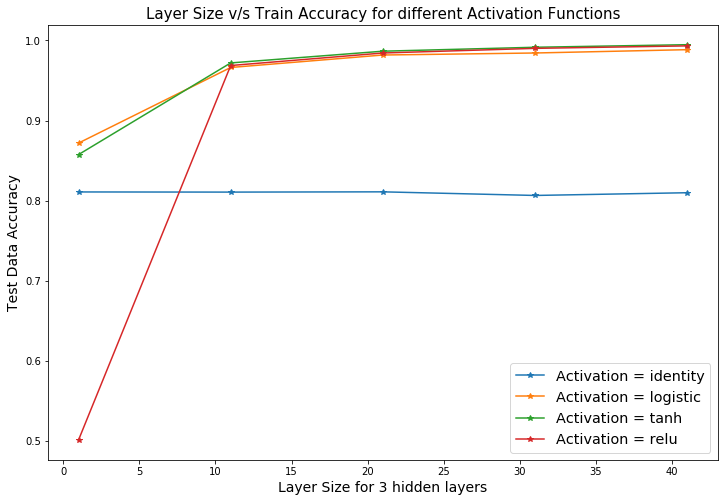

In [22]:
plt.rcParams['figure.figsize'] = (12, 8)
for i in range(0,len(act_func)):
    print("Max Accuracy for Activation function", act_func[i] ,":", "{:.5f}".format(max(acc_ANN_train[i]))
          , "at Layer size:", layer_size[acc_ANN_train[i].index(max(acc_ANN_train[i]))])
print("\n")

for i in range(0,len(act_func)):
    plt.plot(layer_size, acc_ANN_train[i], marker='*', label="Activation = {}".format(act_func[i]))
    plt.legend(loc='lower right', fontsize='x-large')
    plt.xlabel('Layer Size for 3 hidden layers', fontsize=14)
    plt.ylabel('Train Data Accuracy', fontsize=14)
    plt.title('Layer Size v/s Train Accuracy for different Activation Functions', fontsize=15)

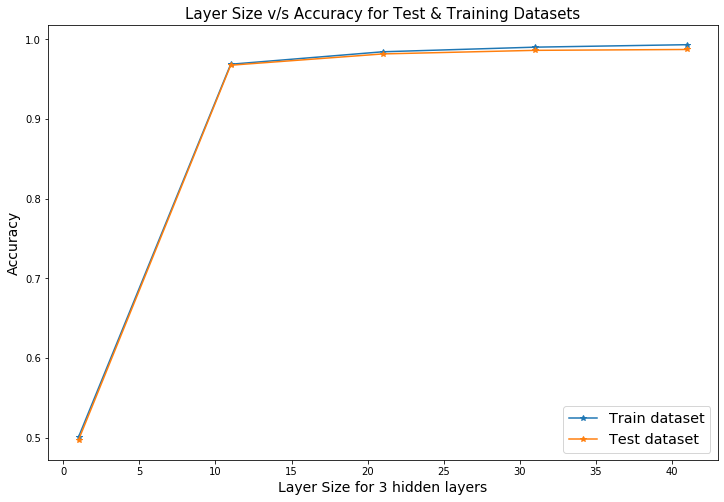

In [23]:
train_acc_relu = acc_ANN_train[3]
test_acc_relu = acc_ANN_test[3]

plt.plot(layer_size, train_acc_relu, marker='*', label="Train dataset")
plt.plot(layer_size, test_acc_relu, marker='*', label="Test dataset")
plt.legend(loc='lower right', fontsize='x-large')
plt.xlabel('Layer Size for 3 hidden layers', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Layer Size v/s Accuracy for Test & Training Datasets', fontsize=15)
plt.show()

### Experimenting with different solver functions and activation functions

In [24]:
acc_ANN_test = []
acc_ANN_train = []
solver = ['lbfgs','sgd','adam']
act_func = ['identity', 'logistic', 'tanh', 'relu']

for j in act_func:
    acc_act_func_test = []
    acc_act_func_train = []
    for i in solver:
        ANN_model = MLPClassifier(hidden_layer_sizes=(50,50,50), solver=i, activation=j, max_iter = 300, random_state=0)
        ANN_model.fit(X_train, y_train)
        
        y_pred_ANN_test = ANN_model.predict(X_test)
        y_pred_ANN_train = ANN_model.predict(X_train)
        
        accuracy_test = accuracy_score(y_test,y_pred_ANN_test)
        accuracy_train = accuracy_score(y_train,y_pred_ANN_train)
        
        acc_act_func_test.append(accuracy_test)
        acc_act_func_train.append(accuracy_train)
        
    acc_ANN_test.append(acc_act_func_test)
    acc_ANN_train.append(acc_act_func_train)

Max Accuracy for Activation function identity : 0.80866 at Solver function: sgd
Max Accuracy for Activation function logistic : 0.98586 at Solver function: adam
Max Accuracy for Activation function tanh : 0.98841 at Solver function: adam
Max Accuracy for Activation function relu : 0.98831 at Solver function: adam




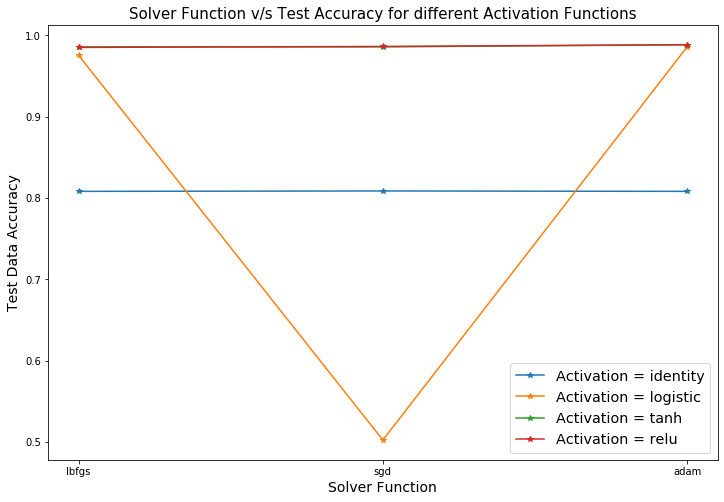

In [25]:
plt.rcParams['figure.figsize'] = (12, 8)
for i in range(0,len(act_func)):
    print("Max Accuracy for Activation function", act_func[i] ,":", "{:.5f}".format(max(acc_ANN_test[i]))
          , "at Solver function:", solver[acc_ANN_test[i].index(max(acc_ANN_test[i]))])
print("\n")

for i in range(0,len(act_func)):
    plt.plot(solver, acc_ANN_test[i], marker='*', label="Activation = {}".format(act_func[i]))
    plt.legend(loc='lower right', fontsize='x-large')
    plt.xlabel('Solver Function', fontsize=14)
    plt.ylabel('Test Data Accuracy', fontsize=14)
    plt.title('Solver Function v/s Test Accuracy for different Activation Functions', fontsize=15)

Max Accuracy for Activation function identity : 0.81092 at Solver function: sgd
Max Accuracy for Activation function logistic : 0.98982 at Solver function: adam
Max Accuracy for Activation function tanh : 0.99695 at Solver function: adam
Max Accuracy for Activation function relu : 0.99503 at Solver function: adam




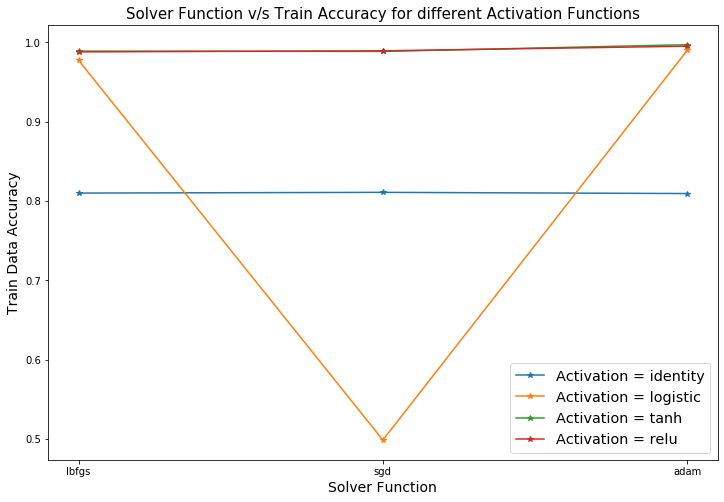

In [26]:
plt.rcParams['figure.figsize'] = (12, 8)
for i in range(0,len(act_func)):
    print("Max Accuracy for Activation function", act_func[i] ,":", "{:.5f}".format(max(acc_ANN_train[i]))
          , "at Solver function:", solver[acc_ANN_train[i].index(max(acc_ANN_train[i]))])
print("\n")

for i in range(0,len(act_func)):
    plt.plot(solver, acc_ANN_train[i], marker='*', label="Activation = {}".format(act_func[i]))
    plt.legend(loc='lower right', fontsize='x-large')
    plt.xlabel('Solver Function', fontsize=14)
    plt.ylabel('Train Data Accuracy', fontsize=14)
    plt.title('Solver Function v/s Train Accuracy for different Activation Functions', fontsize=15)

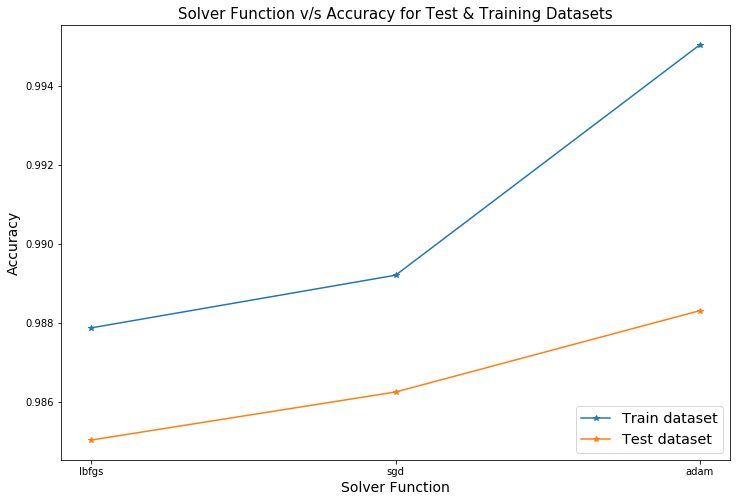

In [27]:
train_acc_relu = acc_ANN_train[3]
test_acc_relu = acc_ANN_test[3]

plt.plot(solver, train_acc_relu, marker='*', label="Train dataset")
plt.plot(solver, test_acc_relu, marker='*', label="Test dataset")
plt.legend(loc='lower right', fontsize='x-large')
plt.xlabel('Solver Function', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Solver Function v/s Accuracy for Test & Training Datasets', fontsize=15)
plt.show()

### Experimenting with different alphas

In [34]:
a = 0.01
ANN_model = MLPClassifier(hidden_layer_sizes=(40,40,40), alpha=a, activation='relu', max_iter = 200, random_state=0)
ANN_model.fit(X_train, y_train)
        
y_pred_ANN_test = ANN_model.predict(X_test)
y_pred_ANN_train = ANN_model.predict(X_train)
        
accuracy_test = accuracy_score(y_test,y_pred_ANN_test)
accuracy_train = accuracy_score(y_train,y_pred_ANN_train)

In [35]:
accuracy_test

0.9868653421633554

In [36]:
accuracy_train

0.9909413434247871

In [7]:
a = 0.005
ANN_model = MLPClassifier(hidden_layer_sizes=(40,40,40), alpha=a, activation='relu', max_iter = 200, random_state=0)
ANN_model.fit(X_train, y_train)
        
y_pred_ANN_test = ANN_model.predict(X_test)
y_pred_ANN_train = ANN_model.predict(X_train)
        
accuracy_test = accuracy_score(y_test,y_pred_ANN_test)
accuracy_train = accuracy_score(y_train,y_pred_ANN_train)

In [8]:
accuracy_test

0.9864652317880794

In [9]:
accuracy_train

0.9909058656575213

In [10]:
a = 0.001
ANN_model = MLPClassifier(hidden_layer_sizes=(40,40,40), alpha=a, activation='relu', max_iter = 200, random_state=0)
ANN_model.fit(X_train, y_train)
        
y_pred_ANN_test = ANN_model.predict(X_test)
y_pred_ANN_train = ANN_model.predict(X_train)
        
accuracy_test = accuracy_score(y_test,y_pred_ANN_test)
accuracy_train = accuracy_score(y_train,y_pred_ANN_train)

In [11]:
accuracy_test

0.9876103752759382

In [12]:
accuracy_train

0.992585146641438

In [13]:
a = 0.0005
ANN_model = MLPClassifier(hidden_layer_sizes=(40,40,40), alpha=a, activation='relu', max_iter = 200, random_state=0)
ANN_model.fit(X_train, y_train)
        
y_pred_ANN_test = ANN_model.predict(X_test)
y_pred_ANN_train = ANN_model.predict(X_train)
        
accuracy_test = accuracy_score(y_test,y_pred_ANN_test)
accuracy_train = accuracy_score(y_train,y_pred_ANN_train)

In [14]:
accuracy_test

0.9873206401766005

In [15]:
accuracy_train

0.9922362819299906

In [16]:
a = 0.0001
ANN_model = MLPClassifier(hidden_layer_sizes=(40,40,40), alpha=a, activation='relu', max_iter = 200, random_state=0)
ANN_model.fit(X_train, y_train)
        
y_pred_ANN_test = ANN_model.predict(X_test)
y_pred_ANN_train = ANN_model.predict(X_train)
        
accuracy_test = accuracy_score(y_test,y_pred_ANN_test)
accuracy_train = accuracy_score(y_train,y_pred_ANN_train)

In [17]:
accuracy_test

0.9872930463576159

In [18]:
accuracy_train

0.9929044465468306

In [19]:
a = 0.00001
ANN_model = MLPClassifier(hidden_layer_sizes=(40,40,40), alpha=a, activation='relu', max_iter = 200, random_state=0)
ANN_model.fit(X_train, y_train)
        
y_pred_ANN_test = ANN_model.predict(X_test)
y_pred_ANN_train = ANN_model.predict(X_train)
        
accuracy_test = accuracy_score(y_test,y_pred_ANN_test)
accuracy_train = accuracy_score(y_train,y_pred_ANN_train)

In [20]:
accuracy_test

0.9880104856512141

In [21]:
accuracy_train

0.9930404446546831

In [22]:
a = 0.000001
ANN_model = MLPClassifier(hidden_layer_sizes=(40,40,40), alpha=a, activation='relu', max_iter = 200, random_state=0)
ANN_model.fit(X_train, y_train)
        
y_pred_ANN_test = ANN_model.predict(X_test)
y_pred_ANN_train = ANN_model.predict(X_train)
        
accuracy_test = accuracy_score(y_test,y_pred_ANN_test)
accuracy_train = accuracy_score(y_train,y_pred_ANN_train)

In [23]:
accuracy_test

0.9877759381898454

In [24]:
accuracy_train

0.9933715704824977

In [25]:
accuracy_train = [0.9933715704824977, 0.9930404446546831, 0.9929044465468306, 0.9922362819299906, 0.992585146641438
                  , 0.9909058656575213, 0.9909413434247871]
accuracy_test = [0.9877759381898454, 0.9880104856512141, 0.9872930463576159, 0.9873206401766005, 0.9876103752759382
                 , 0.9864652317880794, 0.9868653421633554]
alpha = [0.000001, 0.00001, 0.0001, 0.0005, 0.001, 0.005, 0.01]

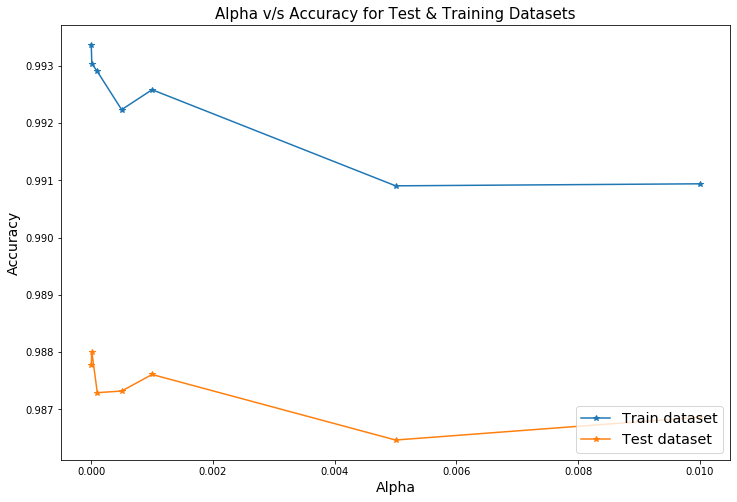

In [27]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.plot(alpha, accuracy_train, marker='*', label="Train dataset")
plt.plot(alpha, accuracy_test, marker='*', label="Test dataset")
plt.legend(loc='lower right', fontsize='x-large')
plt.xlabel('Alpha', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Alpha v/s Accuracy for Test & Training Datasets', fontsize=15)
plt.show()

### Final run of ANN

In [28]:
ANN_model_bst = MLPClassifier(hidden_layer_sizes=(40,40,40), solver='adam', alpha=0.00001, activation='relu'
                          , max_iter=200, random_state=0)
ANN_model_bst.fit(X_train, y_train)
y_pred_ANN_test = ANN_model.predict(X_test)

In [29]:
print("Accuracy:", accuracy_score(y_test,y_pred_ANN_test))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred_ANN_test))
print("\nClassification Report:")
print(classification_report(y_test,y_pred_ANN_test))

Accuracy: 0.9877759381898454

Confusion Matrix:
[[35911   520]
 [  366 35683]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     36431
           1       0.99      0.99      0.99     36049

    accuracy                           0.99     72480
   macro avg       0.99      0.99      0.99     72480
weighted avg       0.99      0.99      0.99     72480



## KNN

### Varying the number of neighbours

In [40]:
acc_KNN_test = []
acc_KNN_train = []
neighbours = np.arange(1,20,2)

for i in neighbours:
    print("neighbour "+str(i)+ " started at "+str(datetime.datetime.fromtimestamp(datetime.datetime.now().timestamp()).isoformat()))
    
    KNN_model = KNeighborsClassifier(n_neighbors=i)
    KNN_model.fit(X_train, y_train)
    
    y_pred_KNN_test = KNN_model.predict(X_test)
    y_pred_KNN_train = KNN_model.predict(X_train)
    
    accuracy_test = accuracy_score(y_test,y_pred_KNN_test)
    accuracy_train = accuracy_score(y_train,y_pred_KNN_train)
    
    acc_KNN_test.append(accuracy_test)
    acc_KNN_train.append(accuracy_train)
    
    print("neighbour "+str(i)+ " ended at "+str(datetime.datetime.fromtimestamp(datetime.datetime.now().timestamp()).isoformat()))

neighbour 1 started at 2020-04-13T13:49:24.369049
neighbour 1 ended at 2020-04-13T13:52:18.622547
neighbour 3 started at 2020-04-13T13:52:18.624542
neighbour 3 ended at 2020-04-13T13:56:35.960418
neighbour 5 started at 2020-04-13T13:56:35.961416
neighbour 5 ended at 2020-04-13T14:03:04.851052
neighbour 7 started at 2020-04-13T14:03:04.853047
neighbour 7 ended at 2020-04-13T14:10:55.527874
neighbour 9 started at 2020-04-13T14:10:55.528872
neighbour 9 ended at 2020-04-13T14:20:04.009600
neighbour 11 started at 2020-04-13T14:20:04.010597
neighbour 11 ended at 2020-04-13T14:30:47.521843
neighbour 13 started at 2020-04-13T14:30:47.522784
neighbour 13 ended at 2020-04-13T14:43:10.966002
neighbour 15 started at 2020-04-13T14:43:10.966999
neighbour 15 ended at 2020-04-13T14:48:55.012858
neighbour 17 started at 2020-04-13T14:48:55.013862
neighbour 17 ended at 2020-04-13T14:54:53.851784
neighbour 19 started at 2020-04-13T14:54:53.852781
neighbour 19 ended at 2020-04-13T15:01:16.835737


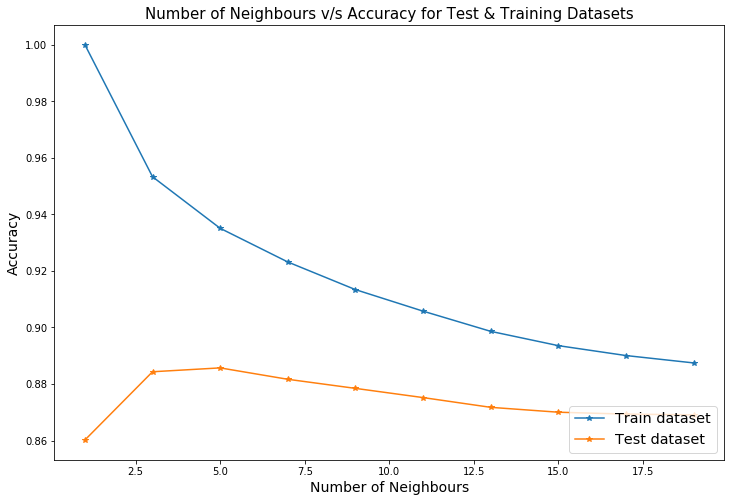

In [41]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.plot(neighbours, acc_KNN_train, marker='*', label="Train dataset")
plt.plot(neighbours, acc_KNN_test, marker='*', label="Test dataset")
plt.legend(loc='lower right', fontsize='x-large')
plt.xlabel('Number of Neighbours', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Number of Neighbours v/s Accuracy for Test & Training Datasets', fontsize=15)
plt.show()

In [42]:
max(acc_KNN_test)

0.8857064017660045

In [47]:
neighbours[acc_KNN_test.index(max(acc_KNN_test))]

5

In [43]:
max(acc_KNN_train)

1.0

In [49]:
neighbours[acc_KNN_train.index(max(acc_KNN_train))]

1

In [50]:
acc_KNN_test

[0.8601959161147903,
 0.8843405077262693,
 0.8857064017660045,
 0.8816777041942605,
 0.8784630242825607,
 0.8752069536423841,
 0.8717577262693157,
 0.8700331125827815,
 0.86935706401766,
 0.8691087196467991]

In [51]:
acc_KNN_train

[1.0,
 0.9532994323557238,
 0.9350697729422895,
 0.9231610690633869,
 0.9133869441816461,
 0.9057710501419111,
 0.8986281929990539,
 0.8935726111636708,
 0.8900721381267739,
 0.8874645222327342]

### Varying weight

In [52]:
weight = ['uniform','distance']
acc_KNN_test = []
acc_KNN_train = []

for i in weight:
    print("weight "+str(i)+ " started at "+str(datetime.datetime.fromtimestamp(datetime.datetime.now().timestamp()).isoformat()))
    KNN_model = KNeighborsClassifier(n_neighbors=5, weights=i)
    KNN_model.fit(X_train, y_train)
    
    y_pred_KNN_test = KNN_model.predict(X_test)
    y_pred_KNN_train = KNN_model.predict(X_train)
    
    accuracy_test = accuracy_score(y_test,y_pred_KNN_test)
    accuracy_train = accuracy_score(y_train,y_pred_KNN_train)
    
    acc_KNN_test.append(accuracy_test)
    acc_KNN_train.append(accuracy_train)
    print("weight "+str(i)+ " ended at "+str(datetime.datetime.fromtimestamp(datetime.datetime.now().timestamp()).isoformat()))

weight uniform started at 2020-04-13T15:10:52.948986
weight uniform ended at 2020-04-13T15:13:42.969402
weight distance started at 2020-04-13T15:13:42.969402
weight distance ended at 2020-04-13T15:16:31.802377


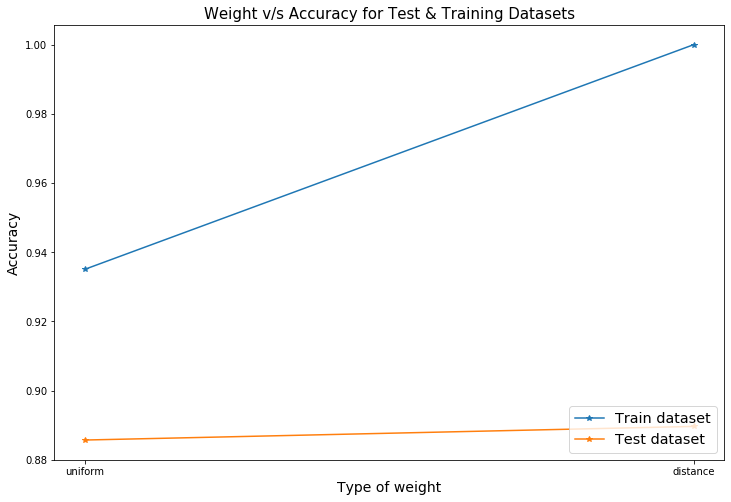

In [53]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.plot(weight, acc_KNN_train, marker='*', label="Train dataset")
plt.plot(weight, acc_KNN_test, marker='*', label="Test dataset")
plt.legend(loc='lower right', fontsize='x-large')
plt.xlabel('Type of weight', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Weight v/s Accuracy for Test & Training Datasets', fontsize=15)
plt.show()

In [54]:
acc_KNN_test

[0.8857064017660045, 0.8896385209713025]

In [55]:
acc_KNN_train

[0.9350697729422895, 1.0]

In [56]:
max(acc_KNN_test)

0.8896385209713025

In [57]:
weight[acc_KNN_test.index(max(acc_KNN_test))]

'distance'

In [58]:
max(acc_KNN_train)

1.0

In [59]:
weight[acc_KNN_train.index(max(acc_KNN_train))]

'distance'

### Varying algorithm

In [60]:
algo = ['auto','ball_tree','kd_tree','brute']
acc_KNN_test = []
acc_KNN_train = []

for i in algo:
    KNN_model = KNeighborsClassifier(n_neighbors=5, algorithm=i)
    KNN_model.fit(X_train, y_train)
    
    y_pred_KNN_test = KNN_model.predict(X_test)
    y_pred_KNN_train = KNN_model.predict(X_train)
    
    accuracy_test = accuracy_score(y_test,y_pred_KNN_test)
    accuracy_train = accuracy_score(y_train,y_pred_KNN_train)
    
    acc_KNN_test.append(accuracy_test)
    acc_KNN_train.append(accuracy_train)

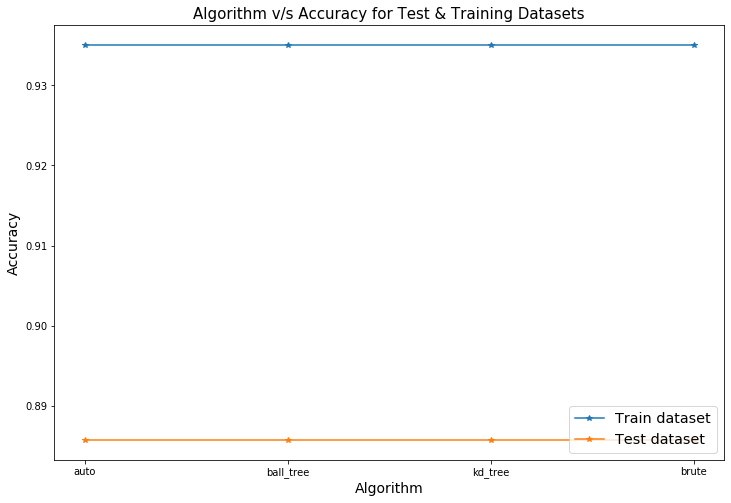

In [61]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.plot(algo, acc_KNN_train, marker='*', label="Train dataset")
plt.plot(algo, acc_KNN_test, marker='*', label="Test dataset")
plt.legend(loc='lower right', fontsize='x-large')
plt.xlabel('Algorithm', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Algorithm v/s Accuracy for Test & Training Datasets', fontsize=15)
plt.show()

In [62]:
acc_KNN_test

[0.8857064017660045,
 0.8857064017660045,
 0.8857064017660045,
 0.8857064017660045]

In [63]:
acc_KNN_train

[0.9350697729422895,
 0.9350697729422895,
 0.9350697729422895,
 0.9350697729422895]

In [64]:
max(acc_KNN_test)

0.8857064017660045

In [65]:
algo[acc_KNN_test.index(max(acc_KNN_test))]

'auto'

In [66]:
max(acc_KNN_train)

0.9350697729422895

In [67]:
algo[acc_KNN_train.index(max(acc_KNN_train))]

'auto'

### Varying p

In [68]:
p = [1,2,3]
acc_KNN_test = []
acc_KNN_train = []

for i in p:
    print("P "+str(i)+ " started at "+str(datetime.datetime.fromtimestamp(datetime.datetime.now().timestamp()).isoformat()))
    KNN_model = KNeighborsClassifier(n_neighbors=5, p=i)
    KNN_model.fit(X_train, y_train)
    
    y_pred_KNN_test = KNN_model.predict(X_test)
    y_pred_KNN_train = KNN_model.predict(X_train)
    
    accuracy_test = accuracy_score(y_test,y_pred_KNN_test)
    accuracy_train = accuracy_score(y_train,y_pred_KNN_train)
    
    acc_KNN_test.append(accuracy_test)
    acc_KNN_train.append(accuracy_train)
    
    print("P "+str(i)+" ended at "+str(datetime.datetime.fromtimestamp(datetime.datetime.now().timestamp()).isoformat()))

P 1 started at 2020-04-13T16:00:33.254040
P 1 ended at 2020-04-13T16:03:48.084549
P 2 started at 2020-04-13T16:03:48.084549
P 2 ended at 2020-04-13T16:06:36.755185
P 3 started at 2020-04-13T16:06:36.756183
P 3 ended at 2020-04-13T16:19:05.595283


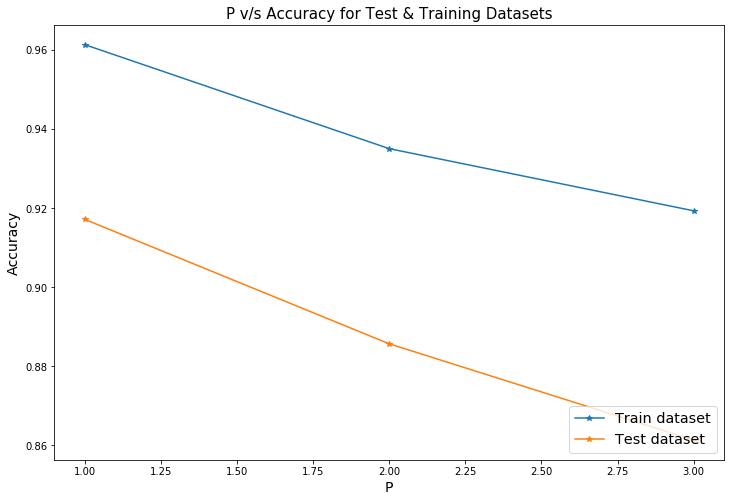

In [69]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.plot(p, acc_KNN_train, marker='*', label="Train dataset")
plt.plot(p, acc_KNN_test, marker='*', label="Test dataset")
plt.legend(loc='lower right', fontsize='x-large')
plt.xlabel('P', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('P v/s Accuracy for Test & Training Datasets', fontsize=15)
plt.show()

In [70]:
acc_KNN_test

[0.9171771523178808, 0.8857064017660045, 0.8613686534216336]

In [71]:
acc_KNN_train

[0.9613706244087039, 0.9350697729422895, 0.9193531220435194]

In [72]:
max(acc_KNN_test)

0.9171771523178808

In [73]:
p[acc_KNN_test.index(max(acc_KNN_test))]

1

In [74]:
max(acc_KNN_train)

0.9613706244087039

In [75]:
p[acc_KNN_train.index(max(acc_KNN_train))]

1

### Final KNN run

In [76]:
KNN_model_bst = KNeighborsClassifier(n_neighbors=5, weights='distance', p=1)
KNN_model_bst.fit(X_train, y_train)
y_pred_KNN_test = KNN_model_bst.predict(X_test)

In [77]:
print("Accuracy:", accuracy_score(y_test,y_pred_KNN_test))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred_KNN_test))
print("\nClassification Report:")
print(classification_report(y_test,y_pred_KNN_test))

Accuracy: 0.9168736203090507

Confusion Matrix:
[[33903  2528]
 [ 3497 32552]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     36431
           1       0.93      0.90      0.92     36049

    accuracy                           0.92     72480
   macro avg       0.92      0.92      0.92     72480
weighted avg       0.92      0.92      0.92     72480



## Cross Validation Scores on the best models

In [79]:
ANN_model_bst = MLPClassifier(hidden_layer_sizes=(40,40,40), solver='adam', alpha=0.00001, activation='relu'
                          , max_iter=200, random_state=0)
cv_ANN = cross_validate(ANN_model_bst, X_sc, y, cv=5)

In [78]:
KNN_model_bst = KNeighborsClassifier(n_neighbors=5, weights='distance', p=1)
cv_KNN = cross_validate(KNN_model_bst, X_sc, y, cv=5)

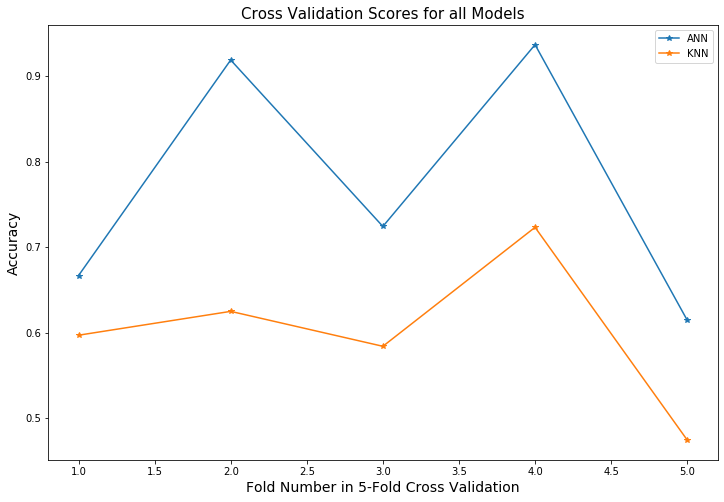

In [80]:
iter=[1,2,3,4,5]

plt.plot(iter, cv_ANN['test_score'], marker = '*', label = 'ANN')
plt.plot(iter, cv_KNN['test_score'], marker = '*', label = 'KNN')

plt.xlabel('Fold Number in 5-Fold Cross Validation', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)
plt.title('Cross Validation Scores for all Models', fontsize = 15)
plt.legend()

plt.show()